In [96]:
import sys
import os
import os.path
import fnmatch
from lxml import etree
from lxml.etree import tostring
import re
from collections import defaultdict
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np


Processing file 1827_Vidocq-Eugène-François_Mémoires-de-Vidocq-Tome-IV.xml

Processing file 2013_Sannois-Comtesse-de_Les-Soirées-à-la-maison.xml

Processing file 1884_Maupassant-Guy-de_Les-soeurs-Rondoli.xml

Processing file 1898_Verne-Jules_Le-Superbe-Orénoque.xml

Processing file 1841_Dumas-Alexandre-Père_Le-chevalier-d’Harmental-I.xml

Processing file 1887_Huysmans-Joris-Karl_Un-dilemme.xml

Processing file 1729_Montesquieu_Arsace-et-Isménie.xml

Processing file 1878_Zola-Émile_Une-page-d’amour.xml

Processing file 1838_Dupin-Antoinette_Comment-tout-finit-par-Mme-A.-Dupin-Tome-2-(1858).xml

Processing file 1899_Eekhoud-Georges_Escal-Vigor.xml

Processing file 1887_Maupassant-Guy-de_Pierre-et-Jean.xml

Processing file 1949_Fargue-Léon-Paul_Etc....xml

Processing file 1991_Boileau-Narcejac_La-main-passe.xml

Processing file 2013_Walsh-Joseph-Alexis_Les-Veillées-de-voyage.xml

Processing file 1879_Deslys-Charles_L'ami-du-village.xml

Processing file 2013_Savigny-Laurence-de_Le-Robinso

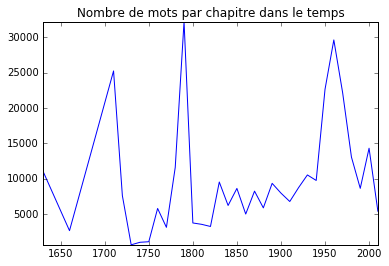

In [97]:
%matplotlib inline
stats=defaultdict(list)
plot=OrderedDict()
bugs=list()
pathToFolder='/home/bilbo/Bureau/ANR/romans/'
for tmpFile in fnmatch.filter(os.listdir(pathToFolder), '*.xml'):
    execute=False
    words=list()
    tmpFile=tmpFile.replace("/",":")
    fullPath=pathToFolder+tmpFile
    
    print("\nProcessing file "+tmpFile)
    
    if os.path.isfile(fullPath):
        tree=etree.parse(fullPath)
        
    yearKey=int(tmpFile[:3]+"0")
    
    if tree.findall(".//div[@type='chapter']"):
        for chapter in tree.findall(".//div[@type='chapter']"):
            tmp="".join(chapter.itertext())
            numWords=len(re.split('[\n\s]+',tmp))
            words.append(numWords)
            execute=True
    elif tree.findall(".//div[@type='part']"):
        for chapter in tree.findall(".//div[@type='part']"):
            tmp="".join(chapter.itertext())
            numWords=len(re.split('[\n\s]+',tmp))
            words.append(numWords)
            execute=True
    
    else :
        bugs.append(tmpFile+" ; ")
        execute=False
    
    if execute==True:
        average=sum(words)/len(words)
        stats[yearKey].append(average)

for year in sorted(stats.keys()):
    if len(stats[year])>0:
        plot[year]=sum(stats[year])/len(stats[year])

plt.xlim(min(plot),max(plot))
plt.ylim(min(plot.values()),max(plot.values()))

#print(bugs)

x = list(plot.keys())
y = list(plot.values())
plt.title('Nombre de mots par chapitre dans le temps')
plt.plot(x,y,'-')
plt.show()